In [4]:
%cd /content/drive/MyDrive/ML/Market_Segmentation/

/content/drive/MyDrive/ML/Market_Segmentation


##Libraries used

In [72]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples,silhouette_score

##Import dataset

In [45]:
data = pd.read_excel("McD.xls")
data

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,2,49,Once a month,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,No,Yes,No,Yes,Yes,No,No,No,Yes,No,Yes,I hate it!-5,47,Once a year,Male
1449,Yes,Yes,No,Yes,No,No,Yes,Yes,No,Yes,No,2,36,Once a week,Female
1450,Yes,Yes,No,Yes,No,Yes,No,Yes,Yes,No,No,3,52,Once a month,Female
1451,Yes,Yes,No,No,No,Yes,Yes,Yes,No,Yes,No,4,41,Every three months,Male


###Dataset exploration

In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   yummy           1453 non-null   object
 1   convenient      1453 non-null   object
 2   spicy           1453 non-null   object
 3   fattening       1453 non-null   object
 4   greasy          1453 non-null   object
 5   fast            1453 non-null   object
 6   cheap           1453 non-null   object
 7   tasty           1453 non-null   object
 8   expensive       1453 non-null   object
 9   healthy         1453 non-null   object
 10  disgusting      1453 non-null   object
 11  Like            1453 non-null   object
 12  Age             1453 non-null   int64 
 13  VisitFrequency  1453 non-null   object
 14  Gender          1453 non-null   object
dtypes: int64(1), object(14)
memory usage: 170.4+ KB


###Unique values for each column

In [47]:
print("Unique values for each column")
for col in data:
    print(col, ":")
    print(data[col].unique())
    print()

Unique values for each column
yummy :
['No' 'Yes']

convenient :
['Yes' 'No']

spicy :
['No' 'Yes']

fattening :
['Yes' 'No']

greasy :
['No' 'Yes']

fast :
['Yes' 'No']

cheap :
['Yes' 'No']

tasty :
['No' 'Yes']

expensive :
['Yes' 'No']

healthy :
['No' 'Yes']

disgusting :
['No' 'Yes']

Like :
[-3 2 1 4 'I love it!+5' 'I hate it!-5' -2 3 0 -4 -1]

Age :
[61 51 62 69 49 55 56 23 58 32 53 28 65 54 67 34 31 47 37 41 36 50 39 35
 20 24 44 40 48 38 57 60 66 42 26 52 29 25 22 45 18 68 43 21 27 33 63 46
 59 19 64 70 30 71]

VisitFrequency :
['Every three months' 'Once a week' 'Once a month' 'Once a year'
 'More than once a week' 'Never']

Gender :
['Female' 'Male']



###Asssigning all the categorical values for the column "Like"

In [48]:
data.replace(["I hate it!-5"],-5, inplace=True)
data.replace(["I love it!+5"],+5, inplace=True)

In [49]:
print(data["Like"].unique())

[-3  2  1  4  5 -5 -2  3  0 -4 -1]


##EDA

###"Like" Column value counts

[Text(0, 0, '-5'),
 Text(0, 0, '-4'),
 Text(0, 0, '-3'),
 Text(0, 0, '-2'),
 Text(0, 0, '-1'),
 Text(0, 0, '0'),
 Text(0, 0, '1'),
 Text(0, 0, '2'),
 Text(0, 0, '3'),
 Text(0, 0, '4'),
 Text(0, 0, '5')]

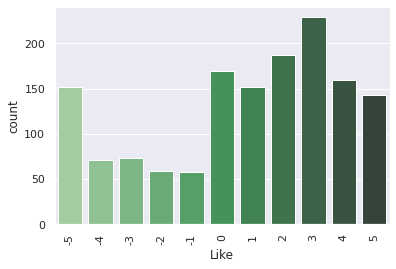

In [57]:
g = sns.countplot(x="Like", data=data, palette="Greens_d");
g.set_xticklabels(g.get_xticklabels(), rotation=90)

###"Gender" Column value counts

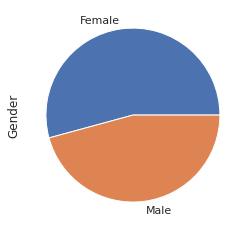

In [56]:
data["Gender"].value_counts().plot.pie()

###Distplot for "Age" feature

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


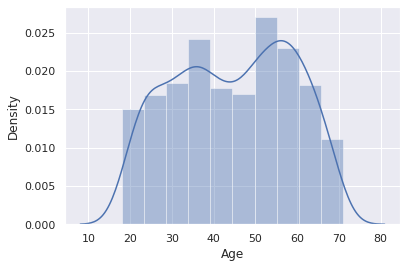

In [60]:
sns.distplot(data['Age'],bins=10)

###Pie Chart for "Visit Frequency"

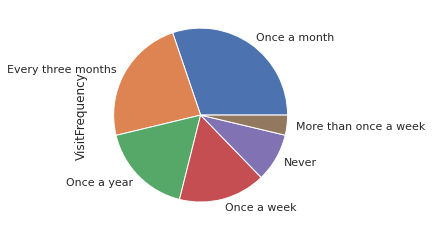

In [61]:
data["VisitFrequency"].value_counts().plot.pie()

##Pre-processing the dataset

###Categorical encoding

In [63]:
lbcode = LabelEncoder()

print("Encoded data: ")
l = ["yummy",	"convenient",	"spicy",	"fattening",	"greasy",	"fast",	"cheap", "tasty",	"expensive",	"healthy",	"disgusting", "VisitFrequency", "Gender"]
def encode(data):
  for i in l:
    data[i] = lbcode.fit_transform(data[i])
  return data

data_encoded = encode(data)
data_encoded

Encoded data: 


,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,0,1,0,1,0,1,1,0,1,0,0,-3,61,0,0
1,1,1,0,1,1,1,1,1,1,0,0,2,51,0,0
2,0,1,1,1,1,1,0,1,1,1,0,1,62,0,0
3,1,1,0,1,1,1,1,1,0,0,1,4,69,4,0
4,0,1,0,1,1,1,1,0,0,1,0,2,49,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,0,1,0,1,1,0,0,0,1,0,1,-5,47,5,1
1449,1,1,0,1,0,0,1,1,0,1,0,2,36,4,0
1450,1,1,0,1,0,1,0,1,1,0,0,3,52,3,0
1451,1,1,0,0,0,1,1,1,0,1,0,4,41,0,1


##Correlation heatmap

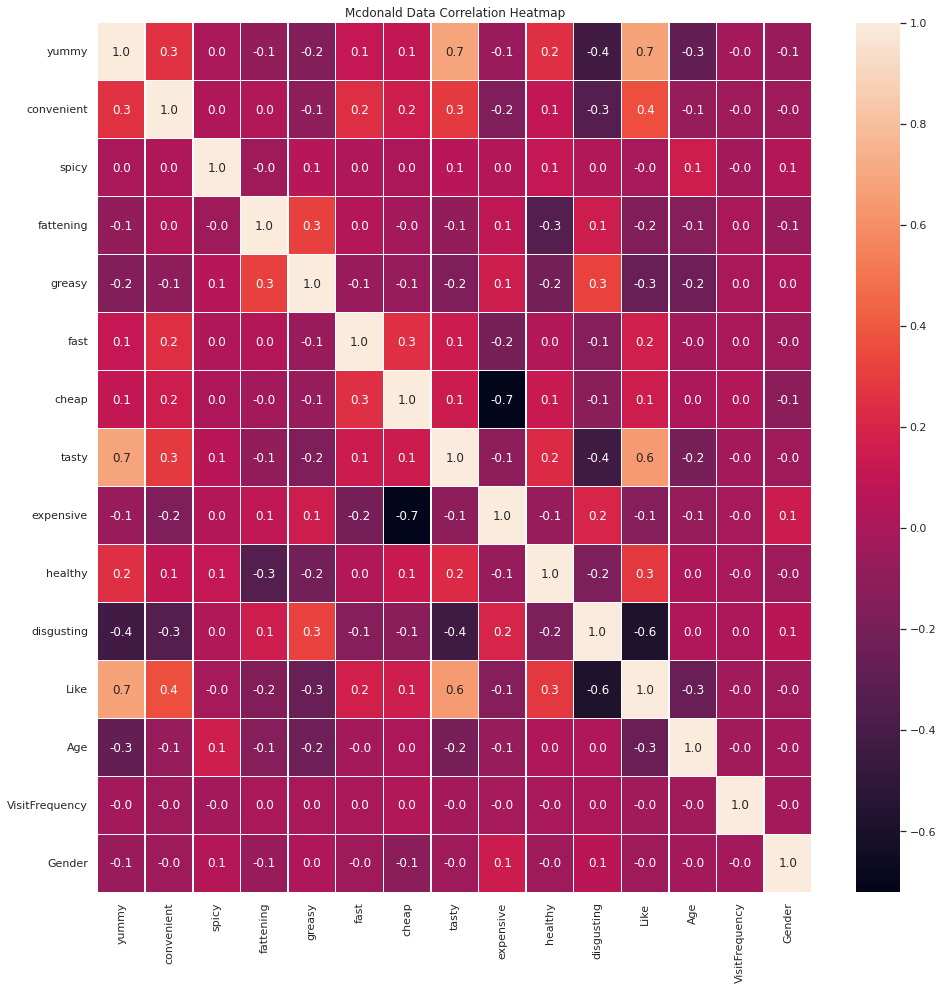

In [64]:
f,ax = plt.subplots(figsize=(16, 16))
sns.heatmap(data.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.title("Mcdonald Data Correlation Heatmap")
plt.show()

From the above correlation matrix:
- "yummy" and "Like" columns show high correlation
- "tasty" and "Like" columns show high correlation

##Principla Component Analysis (PCA)

In [68]:
#Rating features
X = data[['yummy', 'convenient','spicy', 'fattening', 'greasy', 'fast', 'cheap', 'tasty', 'expensive','healthy', 'disgusting']]

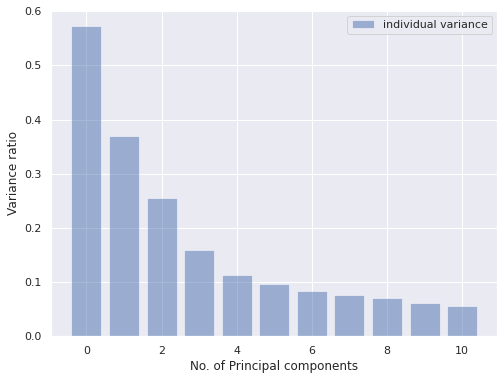

In [69]:
temp_pca = PCA()
temp_pca.fit_transform(X)

plt.figure(figsize=(8, 6))
plt.bar(range(11), temp_pca.explained_variance_, alpha=0.5, label='individual variance')
plt.ylabel('Variance ratio')
plt.xlabel('No. of Principal components')
plt.legend()
plt.show()

In [67]:
pca = PCA()
x_pca=pca.fit_transform(df_ratings)

k=2 chosen for k-means

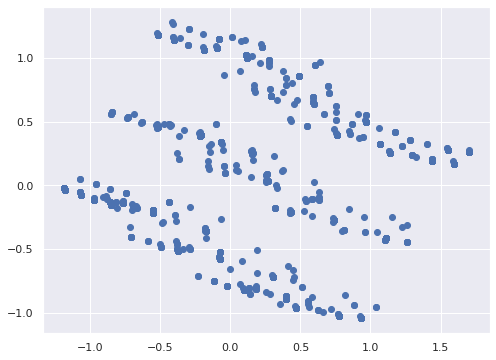

In [70]:
pca = PCA(n_components=2)
pca.fit(X)
x1 = pca.transform(X)
plt.figure(figsize=(8,6))
plt.scatter(x1[:,0], x1[:,1])
plt.show()

In [71]:
x1 = pd.DataFrame(data = x1, columns = ['PC 1', 'PC 2'])

##Applying k-means

In [78]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x1)

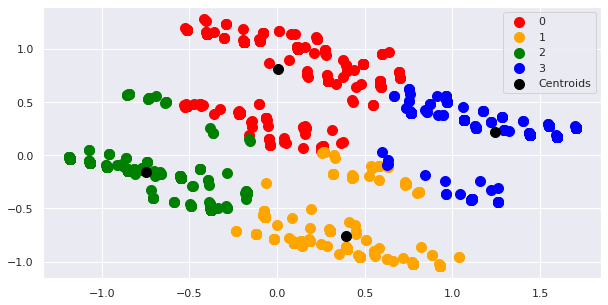

In [81]:
plt.figure(figsize=(10,5))
plt.scatter(x1.values[y_kmeans == 0, 0], x1.values[y_kmeans == 0, 1], s = 100, c = 'red', label = '0')
plt.scatter(x1.values[y_kmeans == 1, 0], x1.values[y_kmeans == 1, 1], s = 100, c = 'orange', label = '1')
plt.scatter(x1.values[y_kmeans == 2, 0], x1.values[y_kmeans == 2, 1], s = 100, c = 'green', label = '2')
plt.scatter(x1.values[y_kmeans == 3, 0], x1.values[y_kmeans == 3, 1], s = 100, c = 'blue', label = '3')

#Plotting the centroids of the cluster
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'black', label = 'Centroids')

plt.legend()

'Elbow method to find optimal value of k'

In [76]:
def calculate_distortion(k):
  kmeanModel = KMeans(n_clusters=k)
  kmeanModel.fit(x1)
  return (kmeanModel.inertia_)

distortions = []
K = range(1,10)
for k in range(1,10):
    distortions.append(calculate_distortion(k))

###Plotting distortions of K-Means

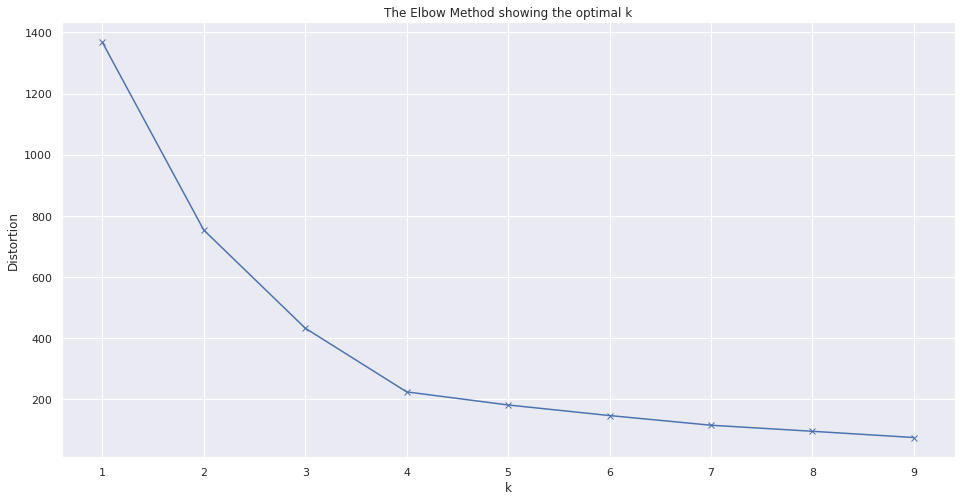

In [77]:
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

It is clearly visaible from the above graph that the 'elbow' is at k=4 i.e. the optimal value of k.